#### joint-task analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

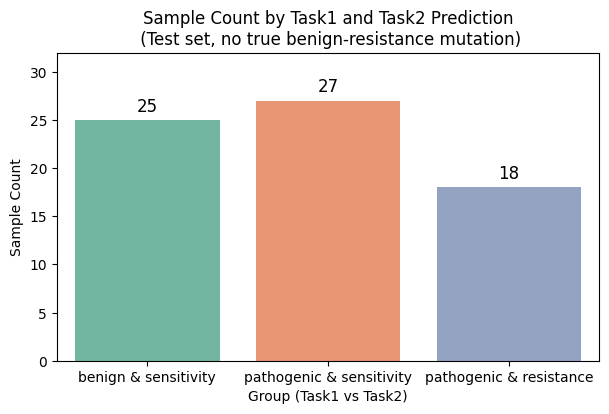

In [2]:
data = pd.read_csv('../datasets/testset_unique_annotation_pred.csv')

# Count combinations
count_df = data.groupby(['task1_prediction', 'task2_prediction']).size().reset_index(name='count')

# Map numeric labels to text
task1_labels = {0: 'benign', 1: 'pathogenic'}
task2_labels = {0: 'sensitivity', 1: 'resistance'}

count_df['task1_prediction'] = count_df['task1_prediction'].map(task1_labels)
count_df['task2_prediction'] = count_df['task2_prediction'].map(task2_labels)

# Create a new column for group names
count_df['group'] = count_df['task1_prediction'] + ' & ' + count_df['task2_prediction']

# Plot
plt.figure(figsize=(7, 4))
ax = sns.barplot(x='group', y='count', data=count_df, palette='Set2')

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=12, color='black', 
                xytext=(0, 10), textcoords='offset points')

# Customize labels
plt.title('Sample Count by Task1 and Task2 Prediction\n (Test set, no true benign-resistance mutation)')
plt.xlabel('Group (Task1 vs Task2)')
plt.ylabel('Sample Count')
ax.set_ylim(0, 32)

# Show plot
plt.savefig('images/multitask/test-distribution.png', dpi=300)
plt.show()